# Lend or Lose

## Problem Statement:
Predict whether the company will give Loan to the person or not.
## Given:
Hand-labeled dataset consisting of columns with unique LoanIDs and whether they are eligible for Loan or no.
## Dateset:
[https://www.kaggle.com/competitions/lend-or-lose/data](https://www.kaggle.com/competitions/lend-or-lose/data)



## Handling Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Preprocessing
## Handling unnecessary values:
Checking for null values and duplicate values.
We ended up observing there are no null or duplicate

In [ ]:
df = pd.read_csv("train.csv")
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,DRIRC89L0T,18,137576,209136,846,26,2,10.47,60,0.81,High School,Self-employed,Single,Yes,No,Business,No,0
1,TS0FIUNHNU,47,57194,5970,748,30,2,19.72,36,0.73,High School,Unemployed,Divorced,No,Yes,Education,No,0
2,I0YR284A1V,26,84328,95065,453,7,2,24.25,12,0.45,Master's,Self-employed,Married,No,No,Other,Yes,0
3,WB1T7NQV8A,53,49795,229582,533,107,3,14.44,60,0.17,Bachelor's,Self-employed,Single,Yes,No,Auto,Yes,1
4,J6GU9M4G1Z,49,115450,22072,840,0,4,24.48,12,0.11,Bachelor's,Part-time,Single,No,Yes,Education,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204272,KYS1HKNGGE,40,116623,161673,651,79,2,23.44,12,0.87,Bachelor's,Part-time,Divorced,No,No,Home,Yes,0
204273,5MAOH3AOZO,67,62958,189499,460,77,3,9.29,36,0.11,Bachelor's,Self-employed,Single,No,No,Business,Yes,0
204274,5Y9Z6NW29X,62,34372,59645,524,94,3,9.72,60,0.24,PhD,Full-time,Single,Yes,No,Auto,No,0
204275,O51974F566,44,146262,198454,489,7,4,4.31,48,0.30,High School,Self-employed,Married,Yes,No,Home,No,0


In [ ]:
df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop(columns="LoanID", inplace=True)

## Looking at the correlation

In [ ]:

from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,18,137576,209136,846,26,2,10.47,60,0.81,1,2,2,1,0,1,0,0
1,47,57194,5970,748,30,2,19.72,36,0.73,1,3,0,0,1,2,0,0
2,26,84328,95065,453,7,2,24.25,12,0.45,2,2,1,0,0,4,1,0
3,53,49795,229582,533,107,3,14.44,60,0.17,0,2,2,1,0,0,1,1
4,49,115450,22072,840,0,4,24.48,12,0.11,0,1,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204272,40,116623,161673,651,79,2,23.44,12,0.87,0,1,0,0,0,3,1,0
204273,67,62958,189499,460,77,3,9.29,36,0.11,0,2,2,0,0,1,1,0
204274,62,34372,59645,524,94,3,9.72,60,0.24,3,0,2,1,0,0,0,0
204275,44,146262,198454,489,7,4,4.31,48,0.30,1,2,1,1,0,3,0,0


In [ ]:
correlation=df.corr()
correlation['Default'].sort_values(ascending=False)

Default           1.000000
InterestRate      0.129885
LoanAmount        0.085519
EmploymentType    0.042670
NumCreditLines    0.028565
DTIRatio          0.018595
LoanTerm          0.000815
MaritalStatus    -0.008441
LoanPurpose      -0.010799
HasMortgage      -0.021174
Education        -0.021508
CreditScore      -0.034128
HasDependents    -0.034737
HasCoSigner      -0.040688
MonthsEmployed   -0.095429
Income           -0.100515
Age              -0.167484
Name: Default, dtype: float64

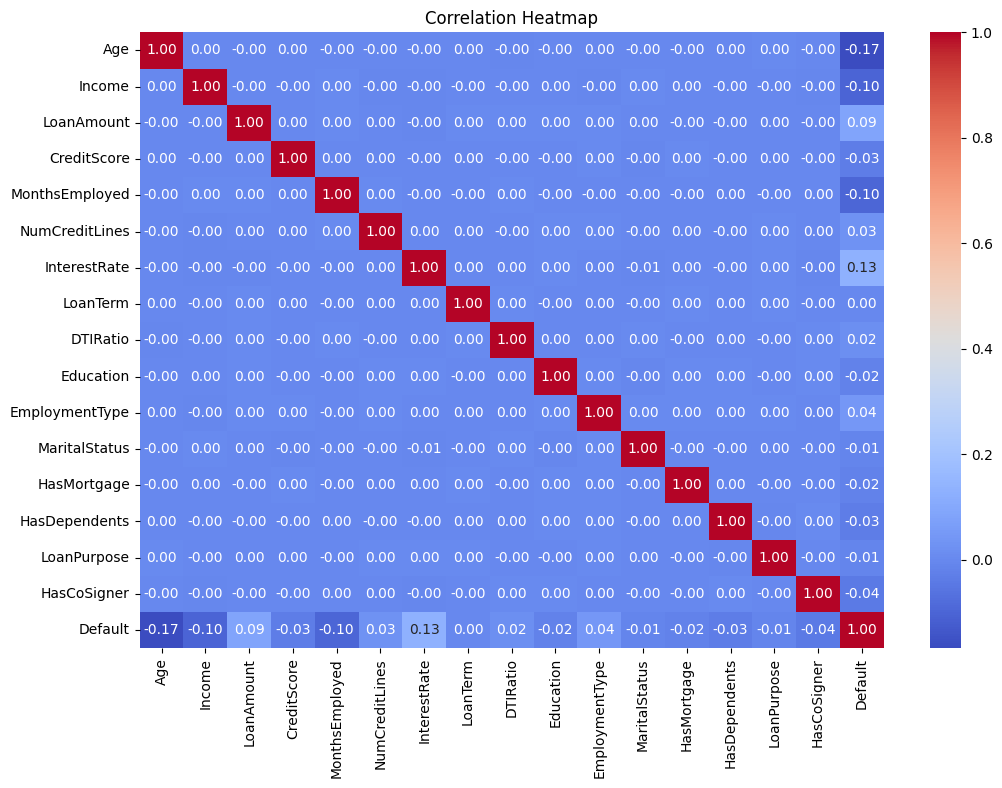

In [ ]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

We end up observing that even though all the columns have less correlation with our target column, the loan term is the one which is least correlated. <br>
Thus we end up dropping it

In [ ]:
df.drop(columns="LoanTerm", inplace=True)

# Visualising the Data
We are visualising the data to get a better idea of how the data is distributed

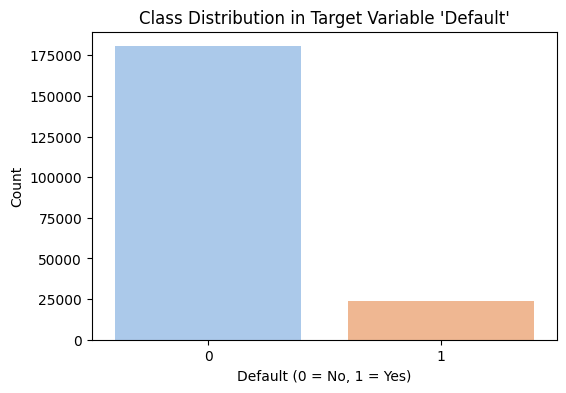

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Default', hue='Default', data=df, palette='pastel', legend=False)
plt.title("Class Distribution in Target Variable 'Default'")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

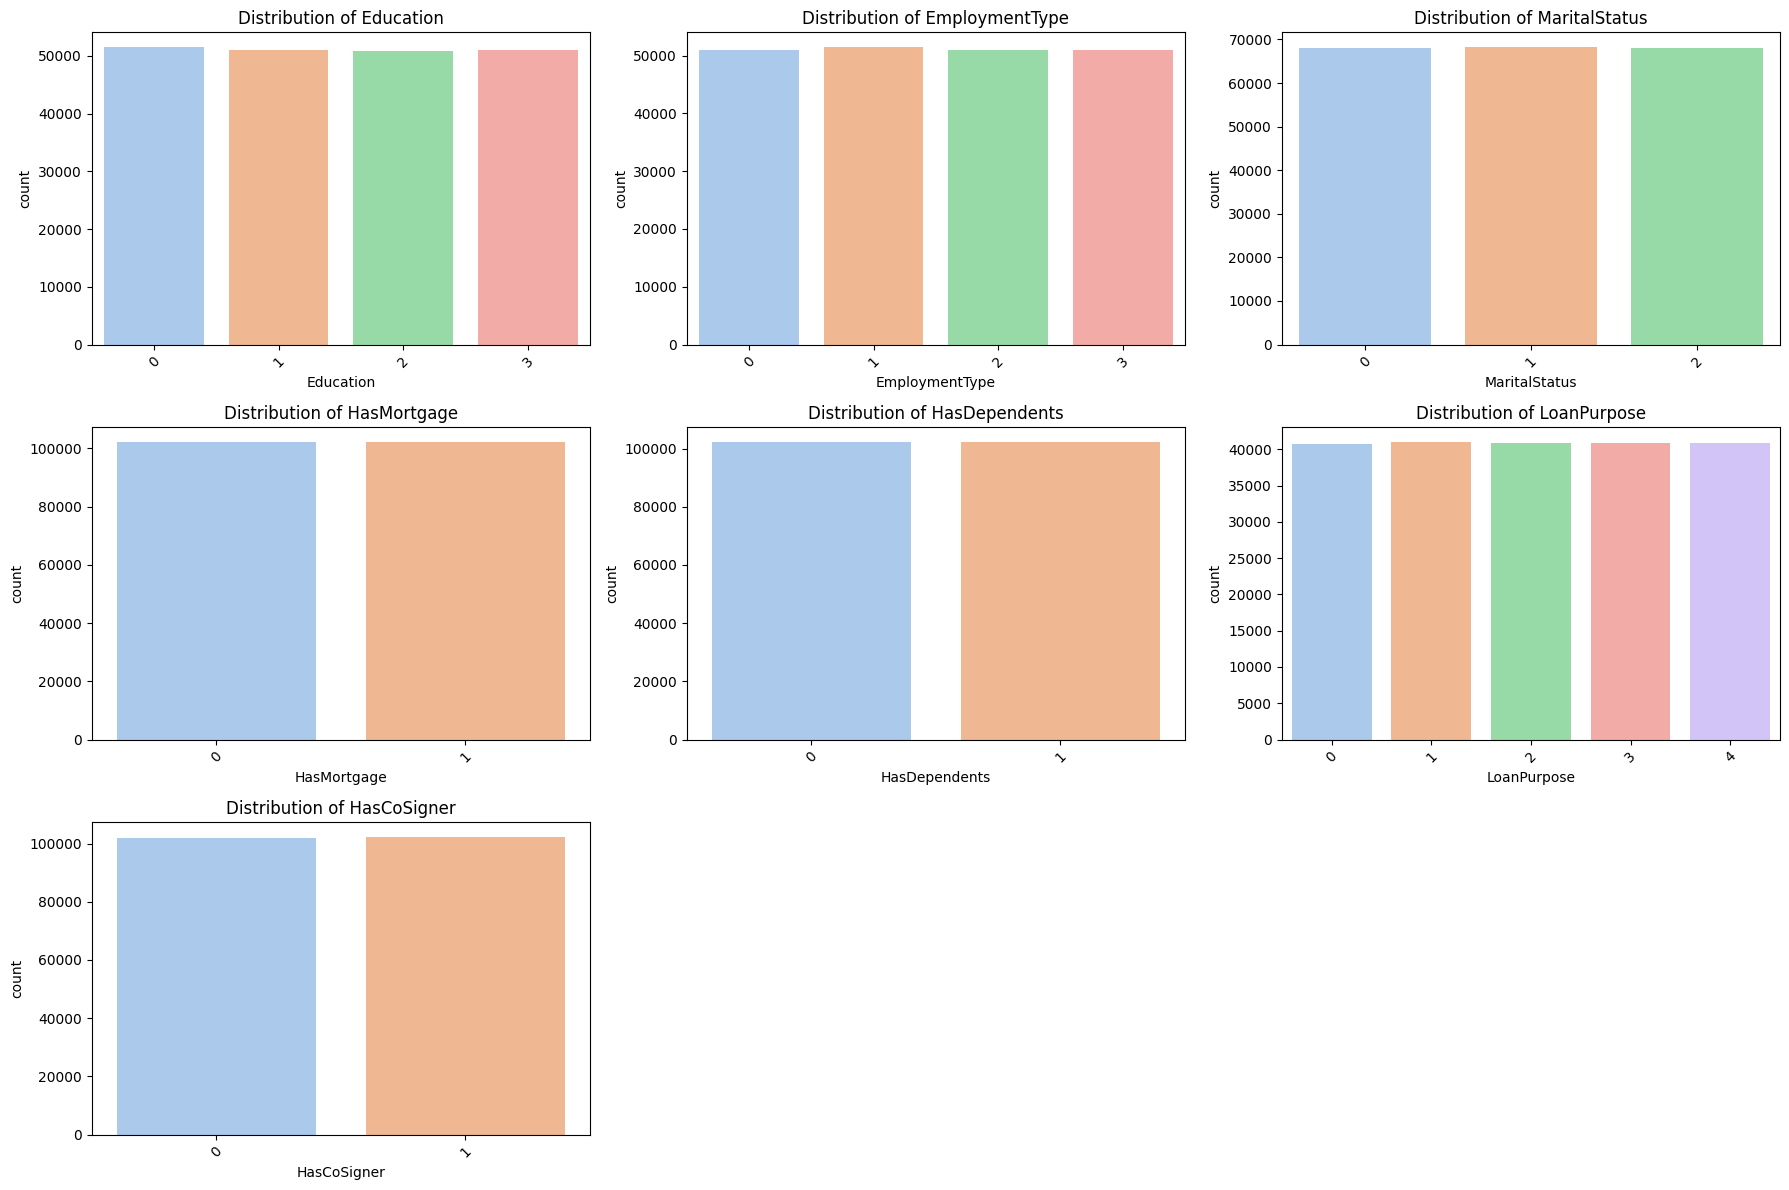

In [ ]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue=col, palette='pastel', legend=False)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


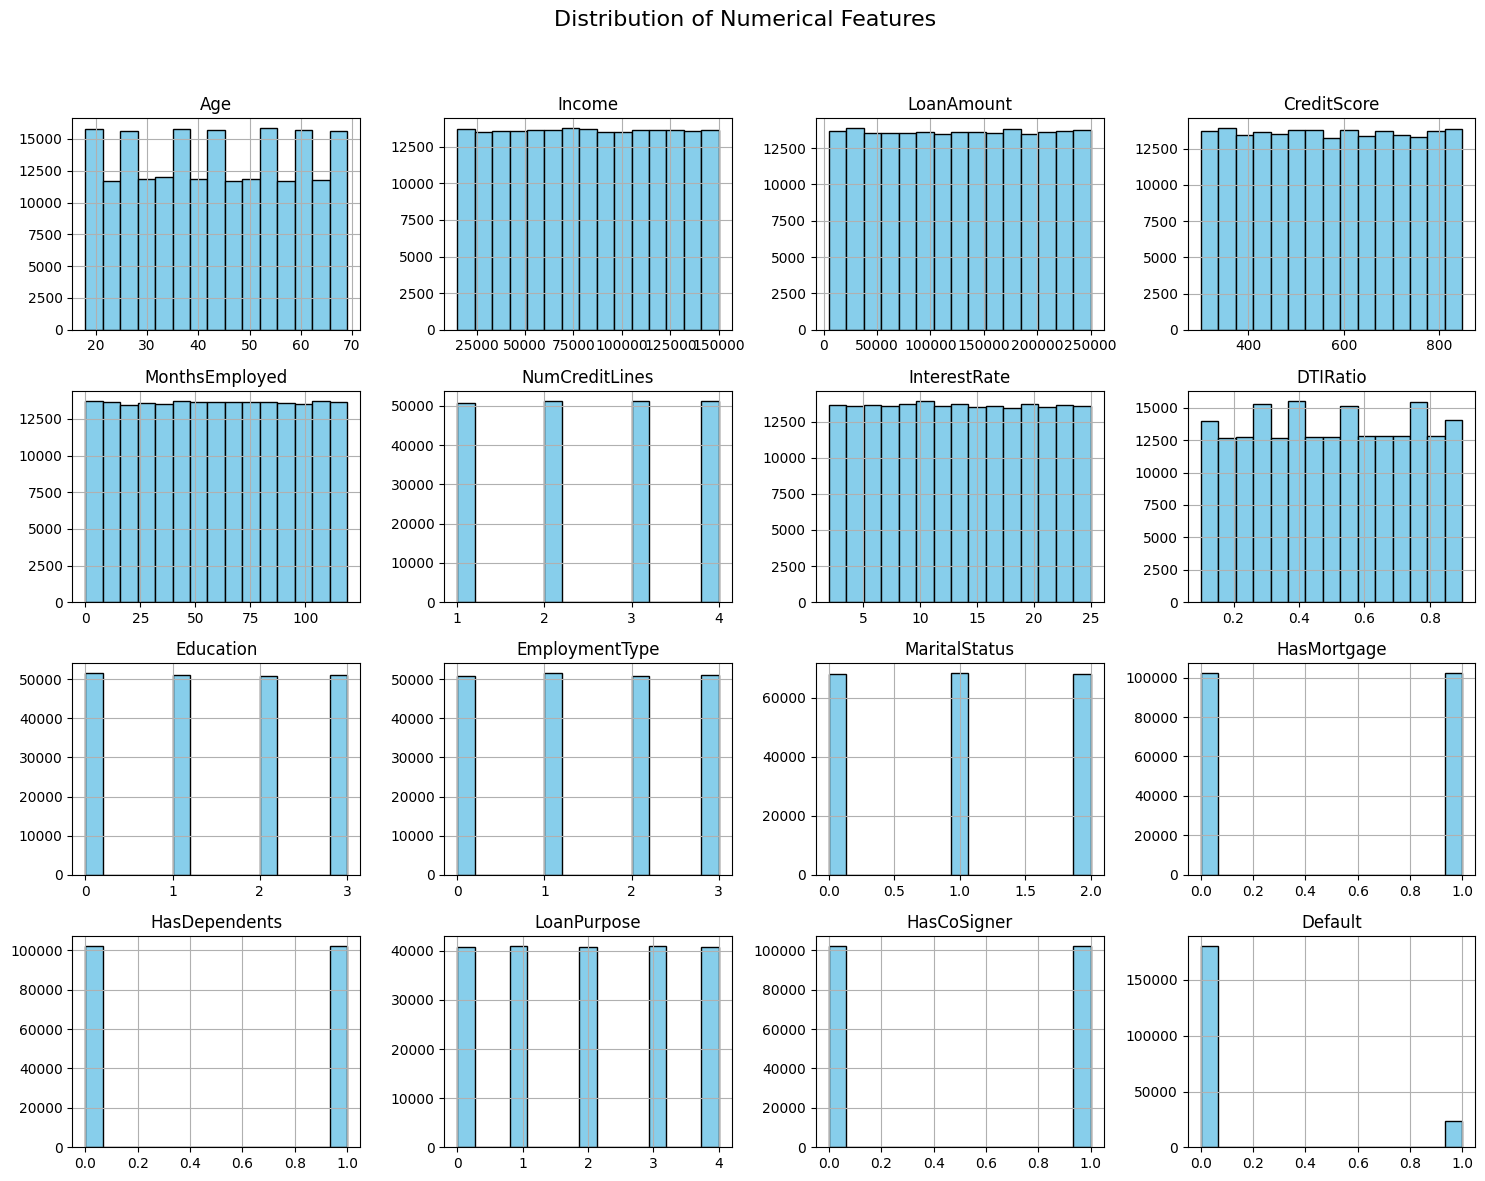

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_columns].hist(bins=15, figsize=(15, 12), layout=(4, 4), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

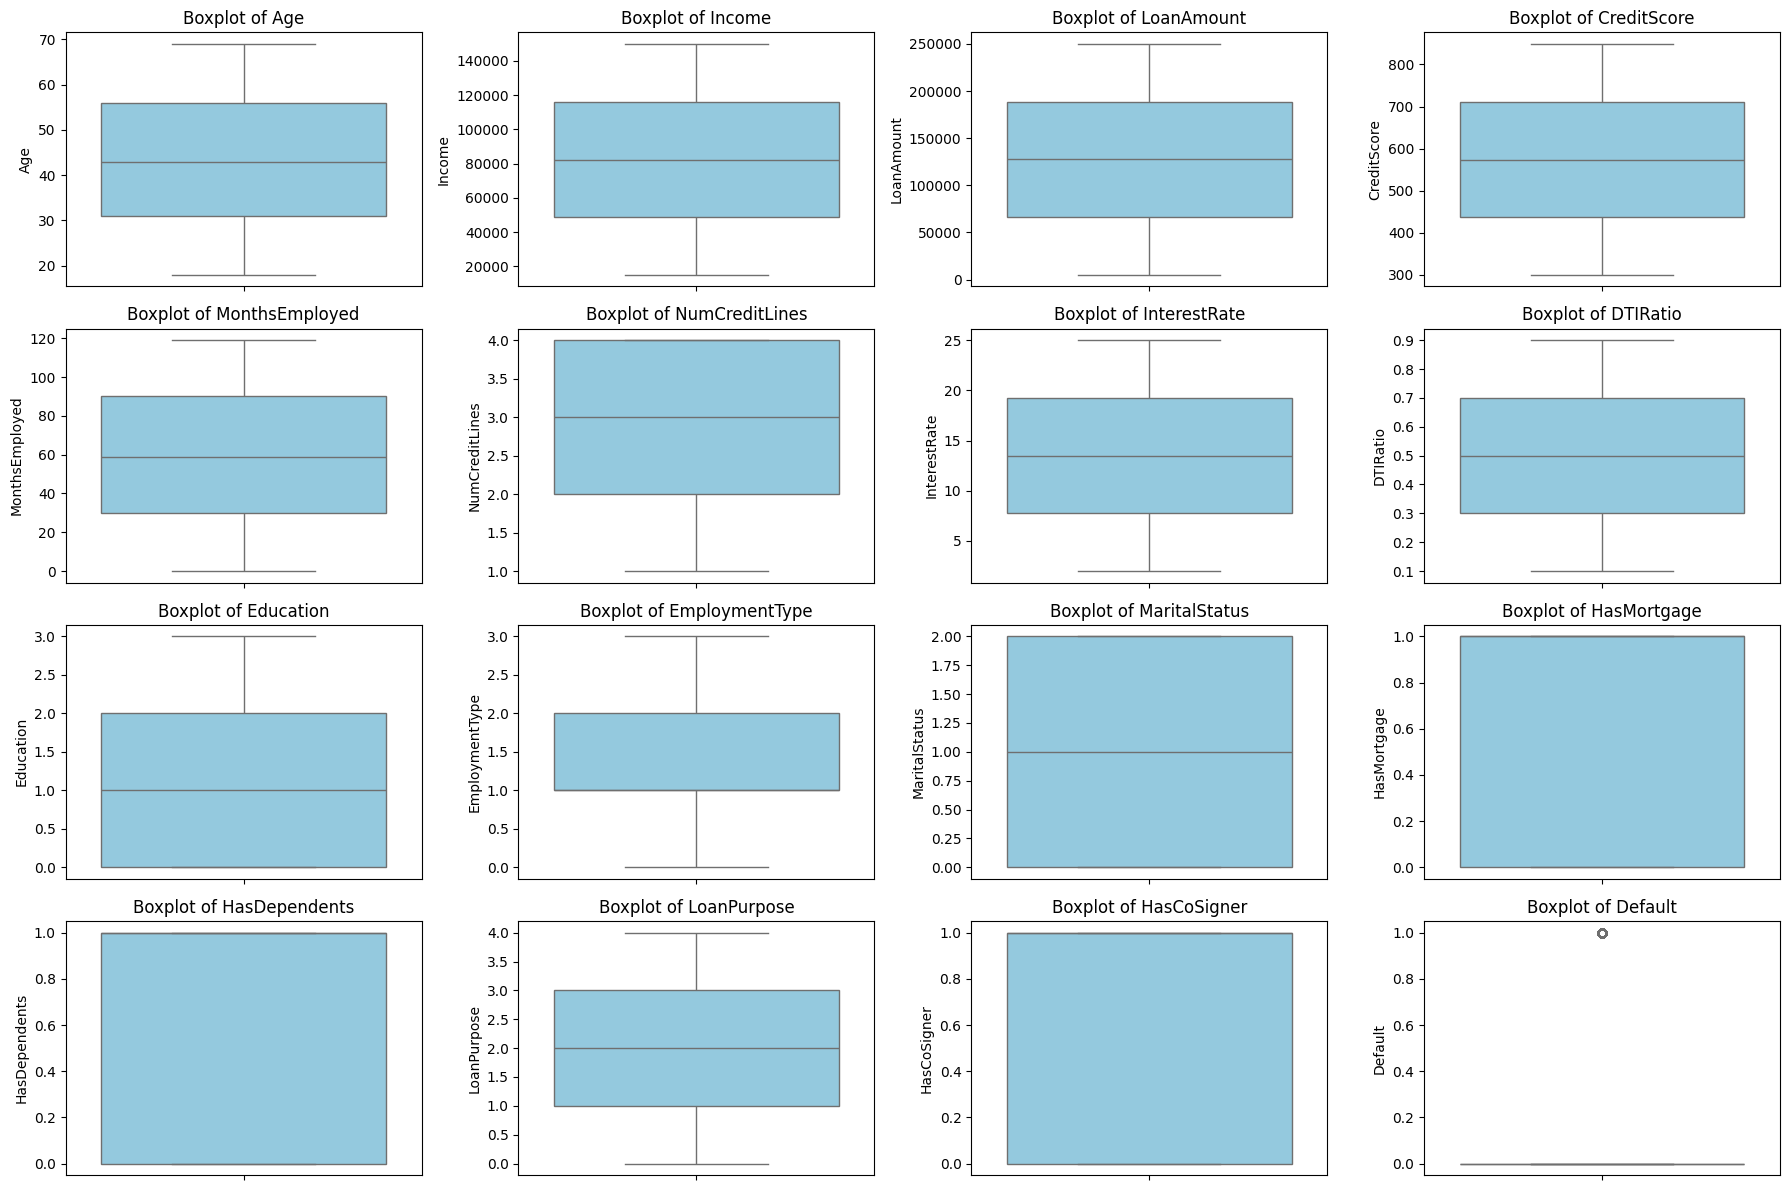

In [ ]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Normalizing the Data
 Normalise the dataset such that they are propertionally scaled between the range 0 and 1

In [ ]:
min_max_scaler = MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(df)
df=pd.DataFrame(normalized_data, columns=df.columns)
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,0.000000,0.907977,0.833211,0.994536,0.218487,0.333333,0.368261,0.8875,0.333333,0.666667,1.0,1.0,0.0,0.25,0.0,0.0
1,0.568627,0.312550,0.003955,0.816029,0.252101,0.333333,0.770435,0.7875,0.333333,1.000000,0.0,0.0,1.0,0.50,0.0,0.0
2,0.156863,0.513545,0.367611,0.278689,0.058824,0.333333,0.967391,0.4375,0.666667,0.666667,0.5,0.0,0.0,1.00,1.0,0.0
3,0.686275,0.257743,0.916665,0.424408,0.899160,0.666667,0.540870,0.0875,0.000000,0.666667,1.0,1.0,0.0,0.00,1.0,1.0
4,0.607843,0.744080,0.069678,0.983607,0.000000,1.000000,0.977391,0.0125,0.000000,0.333333,1.0,0.0,1.0,0.50,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204272,0.431373,0.752769,0.639483,0.639344,0.663866,0.333333,0.932174,0.9625,0.000000,0.333333,0.0,0.0,0.0,0.75,1.0,0.0
204273,0.960784,0.355247,0.753059,0.291439,0.647059,0.666667,0.316957,0.0125,0.000000,0.666667,1.0,0.0,0.0,0.25,1.0,0.0
204274,0.862745,0.143497,0.223039,0.408015,0.789916,0.666667,0.335652,0.1750,1.000000,0.000000,1.0,1.0,0.0,0.00,0.0,0.0
204275,0.509804,0.972318,0.789611,0.344262,0.058824,1.000000,0.100435,0.2500,0.333333,0.666667,0.5,1.0,0.0,0.75,0.0,0.0


# Over Sampling and Train Test split
Here we use SMOTE to Oversample the data and split the data into training and testing

In [ ]:
X = df.drop('Default', axis=1)
y = df['Default']
smote = SMOTE(sampling_strategy='minority', random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
137918,0.529412,0.429099,0.074494,0.393443,0.605042,0.000000,0.979565,0.8625,0.333333,1.000000,0.5,1.0,0.0,0.50,1.0
32623,0.450980,0.373610,0.044792,0.051002,0.680672,1.000000,0.739130,0.7375,0.333333,1.000000,0.0,0.0,0.0,0.75,0.0
20894,0.313725,0.978400,0.279455,0.559199,0.563025,0.000000,0.269565,0.7000,0.666667,0.000000,1.0,0.0,1.0,0.25,1.0
116646,0.137255,0.611812,0.655344,0.344262,0.966387,1.000000,0.831304,0.1375,0.666667,0.000000,1.0,0.0,1.0,1.00,0.0
3325,0.078431,0.951229,0.783831,0.225865,0.126050,0.666667,0.471304,0.6375,0.666667,0.666667,0.0,1.0,1.0,0.25,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.745098,0.598012,0.300198,0.510018,0.445378,0.333333,0.495217,0.5500,0.000000,0.333333,0.0,0.0,0.0,1.00,1.0
103694,0.274510,0.232668,0.091878,0.908925,0.478992,1.000000,0.530435,0.3875,0.666667,1.000000,0.5,1.0,1.0,0.00,1.0
131932,0.705882,0.945214,0.703740,0.398907,0.168067,0.666667,0.377826,0.4625,1.000000,0.666667,0.5,0.0,0.0,0.75,0.0
146867,0.627451,0.628345,0.640764,0.570128,0.512605,0.666667,0.448261,0.5750,0.333333,0.666667,0.0,0.0,1.0,1.00,1.0


## Decision Tree
Decision Tree is used using GridSearchCV. We observe that accuracy on test split was 88.11 and on kaggle the accuracy was 88.259

In [ ]:
d_tree=DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(estimator=d_tree, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2, scoring='accuracy')

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [ ]:
best_model_dt=grid_search.best_estimator_
y_pred=best_model_dt.predict(X_test)
acc=accuracy_score(y_test, y_pred)
acc

0.8811680046994321

## Random Forest
We didnt do grid search cv for random forest since it required large computational time. Thus, we tuned the parameters iteratively and found which random forest was giving the better result. 88.49 was the accuracy on test split and kaggle accuracy was 88.723

In [ ]:
model_RF = RandomForestClassifier(
    n_estimators=150,
    max_depth=50,
    min_samples_split=5,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=42,
)


model_RF.fit(X_train, y_train)
y_pred= model_RF.predict(X_test)
acc=accuracy_score(y_test, y_pred)
acc

0.8849618171137654

## Xgboost
xg boost gave us the maximum accuracy on kaggle. 88.5 on the test split and 88.801 on kaggle

In [ ]:
gb_model = GradientBoostingClassifier(random_state=42,
    n_estimators=150,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=3,
    min_samples_leaf=3,
    subsample=0.8,
    max_features='sqrt')
gb_model.fit(X_train, y_train)

gb_predictions = gb_model.predict(X_test)

acc=accuracy_score(y_test, gb_predictions)
acc

0.8850107695320149

## Extra Trees
Extra trees gave us 88.36 on the test split and 88.507 on kaggle

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
extraTreeModel = ExtraTreesClassifier(n_estimators=300,random_state=42,criterion='gini',bootstrap=True)
extraTreeModel.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=True, n_estimators=300, random_state=42)

In [ ]:
ypred = extraTreeModel.predict(X_test)
accuracy = accuracy_score(y_test, ypred)
accuracy

0.8836890542392795

# Light GBM
we used LGBM which gave maximum accuracy on test split 88.52 but 88.760 on kaggle

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, n_jobs=-1, subsample=0.8)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred))

[LightGBM] [Info] Number of positive: 18970, number of negative: 144451
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1297
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116081 -> initscore=-2.030082
[LightGBM] [Info] Start training from score -2.030082
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

## AdaBoost
we tried ada boost using only decision tree model as the rest were computationally inefficient to find. Test accuracy was very low 80%. and kaggle score was 80.29%

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adaboost = AdaBoostClassifier(estimator = d_tree, n_estimators=200,random_state=42, algorithm='SAMME')
adaboost.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(random_state=42),
                   n_estimators=200, random_state=42)

In [ ]:
y_pred = adaboost.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc


0.8019874681809281

## GradientBoost
Gradient boost gives test accuracy of 88.48 and the kaggle score is 88.72

In [ ]:
g_bt = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
g_bt.fit(X_train, y_train)
y_pred = g_bt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc


0.8848883884863912

## Polynomial Regression

In [ ]:
poly_degree = 2

poly = PolynomialFeatures(degree=poly_degree)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_test)


lr_model = LinearRegression()
lr_model.fit(X_train_poly, y_train)

y_val_pred = lr_model.predict(X_val_poly)

y_val_pred_rounded = np.round(y_val_pred)
accuracy = accuracy_score(y_test, y_val_pred_rounded)
accuracy



0.8849618171137654

## Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)


## Training the models on the PCA-transformed data

In [ ]:
dtreePCA = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dtreePCA, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train_PCA, y_train)

# Get the best model from grid search
best_model_dt = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_PCA = best_model_dt.predict(X_test_PCA)

# Calculate the accuracy
acc_dt = accuracy_score(y_test, y_pred_PCA)
print("Decision Tree Accuracy:", acc_dt)


Fitting 10 folds for each of 72 candidates, totalling 720 fits


Decision Tree Accuracy: 0.8818533385549246


In [ ]:
model_RF = RandomForestClassifier(
    n_estimators=150,
    max_depth=50,
    min_samples_split=5,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=42,
)
model_RF.fit(X_train_PCA, y_train)
y_pred= model_RF.predict(X_test_PCA)
acc=accuracy_score(y_test, y_pred)
acc

0.8790385745055805

In [ ]:
gb_model_PCA = GradientBoostingClassifier(random_state=42,
    n_estimators=150,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=3,
    min_samples_leaf=3,
    subsample=0.8,
    max_features='sqrt')
gb_model_PCA.fit(X_train_PCA, y_train)

gb_predictions = gb_model_PCA.predict(X_test_PCA)

acc=accuracy_score(y_test, gb_predictions)
acc

0.8829302917564128

In [ ]:
extraTreeModelPCA = ExtraTreesClassifier(n_estimators=300,random_state=42,criterion='gini',bootstrap=True)
extraTreeModelPCA.fit(X_train_PCA,y_train)
ypred = extraTreeModelPCA.predict(X_test_PCA)
accuracy = accuracy_score(y_test, ypred)
accuracy

0.877178382612101

In [ ]:
lgbmPCA = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, n_jobs=-1, subsample=0.8)
lgbmPCA.fit(X_train_PCA, y_train)
y_pred = lgbmPCA.predict(X_test_PCA)
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred))

[LightGBM] [Info] Number of positive: 18970, number of negative: 144451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001834 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 163421, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116081 -> initscore=-2.030082
[LightGBM] [Info] Start training from score -2.030082
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [ ]:
adaboostPCA = AdaBoostClassifier(estimator = d_tree, n_estimators=200,random_state=42, algorithm='SAMME')
adaboostPCA.fit(X_train_PCA, y_train)
y_pred = adaboostPCA.predict(X_test_PCA)
acc = accuracy_score(y_test, y_pred)
acc

0.7897738398276875

In [ ]:
g_bt_PCA = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
g_bt_PCA.fit(X_train_PCA, y_train)
y_pred = g_bt_PCA.predict(X_test_PCA)
acc = accuracy_score(y_test, y_pred)
acc


0.8828568631290385

In [ ]:
poly_degree = 2

poly = PolynomialFeatures(degree=poly_degree)
X_train_poly = poly.fit_transform(X_train_PCA)
X_val_poly = poly.transform(X_test_PCA)

lr_model_PCA = LinearRegression()
lr_model_PCA.fit(X_train_poly, y_train)

y_val_pred = lr_model_PCA.predict(X_val_poly)

y_val_pred_rounded = np.round(y_val_pred)
accuracy = accuracy_score(y_test, y_val_pred_rounded)
accuracy

0.8829302917564128

## Testing the data
We format the data so as it is similar to our training dataset.

In [ ]:
test_data = pd.read_csv('test.csv')
test_data

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,CKV34LU7V7,55,112656,92393,581,113,2,23.54,36,0.15,PhD,Self-employed,Single,Yes,Yes,Home,No
1,62KTYNH93J,56,91569,131575,641,54,1,15.19,12,0.43,High School,Part-time,Divorced,Yes,Yes,Education,Yes
2,JGFUSOIUH7,26,78169,75417,569,105,3,18.02,12,0.29,Master's,Part-time,Married,Yes,Yes,Education,Yes
3,4538THBHOX,26,63033,10804,326,118,1,14.71,24,0.41,High School,Part-time,Single,No,No,Business,Yes
4,DXLNA06JHR,24,29665,21182,662,102,3,15.02,60,0.69,PhD,Unemployed,Single,No,Yes,Business,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51065,DQRTA8KWGC,51,99473,170353,628,24,1,17.03,12,0.46,PhD,Self-employed,Divorced,Yes,Yes,Auto,Yes
51066,W0FDMPACG3,29,42016,111314,371,51,4,7.10,36,0.50,PhD,Self-employed,Married,No,No,Other,No
51067,MA0F4U8ORY,67,88507,142666,731,51,1,22.89,48,0.79,Bachelor's,Part-time,Divorced,No,No,Education,No
51068,6QUH04P7EJ,42,116649,190938,488,6,1,10.83,60,0.32,Bachelor's,Full-time,Married,No,Yes,Other,Yes


In [ ]:
Loan = test_data['LoanID'].copy()
test_data.drop(columns="LoanID", inplace=True)
test_data.drop(columns="LoanTerm", inplace=True)
test_data

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,55,112656,92393,581,113,2,23.54,0.15,PhD,Self-employed,Single,Yes,Yes,Home,No
1,56,91569,131575,641,54,1,15.19,0.43,High School,Part-time,Divorced,Yes,Yes,Education,Yes
2,26,78169,75417,569,105,3,18.02,0.29,Master's,Part-time,Married,Yes,Yes,Education,Yes
3,26,63033,10804,326,118,1,14.71,0.41,High School,Part-time,Single,No,No,Business,Yes
4,24,29665,21182,662,102,3,15.02,0.69,PhD,Unemployed,Single,No,Yes,Business,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51065,51,99473,170353,628,24,1,17.03,0.46,PhD,Self-employed,Divorced,Yes,Yes,Auto,Yes
51066,29,42016,111314,371,51,4,7.10,0.50,PhD,Self-employed,Married,No,No,Other,No
51067,67,88507,142666,731,51,1,22.89,0.79,Bachelor's,Part-time,Divorced,No,No,Education,No
51068,42,116649,190938,488,6,1,10.83,0.32,Bachelor's,Full-time,Married,No,Yes,Other,Yes


In [ ]:

from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
label_encoder = LabelEncoder()

for col in categorical_columns:
    test_data[col] = label_encoder.fit_transform(test_data[col])

In [ ]:
min_max_scaler = MinMaxScaler()
normalized_data = min_max_scaler.fit_transform( test_data)
test_data=pd.DataFrame(normalized_data, columns= test_data.columns)
test_data

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,0.725490,0.723410,0.356727,0.511840,0.949580,0.333333,0.936522,0.0625,1.000000,0.666667,1.0,1.0,1.0,0.75,0.0
1,0.745098,0.567203,0.516662,0.621129,0.453782,0.000000,0.573478,0.4125,0.333333,0.333333,0.0,1.0,1.0,0.50,1.0
2,0.156863,0.467939,0.287433,0.489982,0.882353,0.666667,0.696522,0.2375,0.666667,0.333333,0.5,1.0,1.0,0.50,1.0
3,0.156863,0.355816,0.023691,0.047359,0.991597,0.000000,0.552609,0.3875,0.333333,0.333333,1.0,0.0,0.0,0.25,1.0
4,0.117647,0.108634,0.066053,0.659381,0.857143,0.666667,0.566087,0.7375,1.000000,1.000000,1.0,0.0,1.0,0.25,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51065,0.647059,0.625754,0.674949,0.597450,0.201681,0.000000,0.653478,0.4500,1.000000,0.666667,0.0,1.0,1.0,0.00,1.0
51066,0.215686,0.200127,0.433959,0.129326,0.428571,1.000000,0.221739,0.5000,1.000000,0.666667,0.5,0.0,0.0,1.00,0.0
51067,0.960784,0.544520,0.561934,0.785064,0.428571,0.000000,0.908261,0.8625,0.000000,0.333333,0.0,0.0,0.0,0.50,0.0
51068,0.470588,0.752989,0.758974,0.342441,0.050420,0.000000,0.383913,0.2750,0.000000,0.000000,0.5,0.0,1.0,1.00,1.0


In [ ]:
X_test_PCA = pca.transform(test_data)

## We predict the test data using  the best model (XgBoost) and create submission csv file

In [ ]:
XTest = test_data
predictions=gb_model.predict(XTest)


In [ ]:
output = pd.DataFrame({
    'LoanID': Loan,'Default': predictions
})

output.to_csv('Submission.csv', index=False)